In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

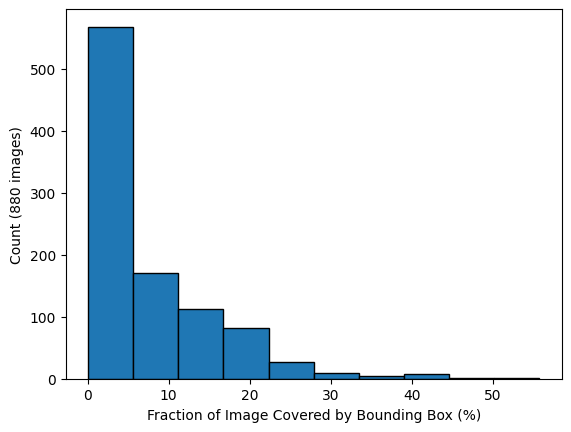

In [222]:
BB = pd.read_csv('../data/BBox_List_2017.csv')
plt.hist(100 * BB['w'] * BB['h]'] / (1024 * 1024), edgecolor='black')
plt.xlabel("Fraction of Image Covered by Bounding Box (%)")
plt.ylabel("Count ("+str(len(BB['Image Index'].unique()))+ " images)")
plt.show()

In [223]:
df = pd.read_csv('aggregated_results.csv')
df = df.rename(columns={'dict_number': 'repeat', 'imagename': 'image', 'rot': 'rotation'})
df = df[~((df['rotation'] == 0) & (df['crop'] == 1))]

df0 = df[(df['rotation'] == 0) & (df['crop'] == 0)]
df0 = df0.rename(columns={'value': 'original'})
df0 = df0.drop(columns=['rotation', 'crop'])

df = df[~((df['rotation'] == 0) & (df['crop'] == 0))]

df = df.merge(df0, on=['image', 'repeat', 'metric'])

df['drop_value'] = df['original'] - df['value']

df['distortion'] = 'rotation: ' + df['rotation'].astype(str) + ', crop: ' + df['crop'].map({1: 'yes', 0: 'no'})
df['repeat'] = 1 + df['repeat']

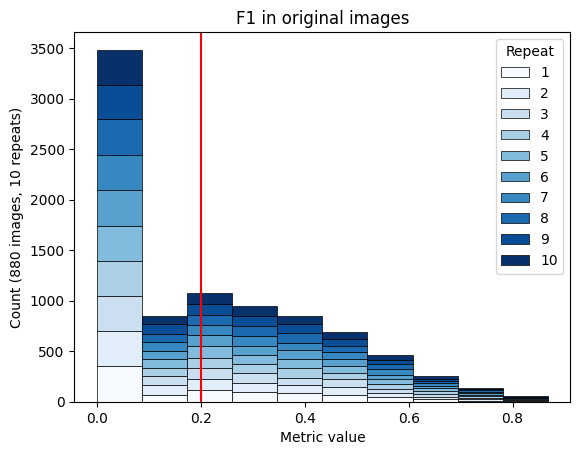

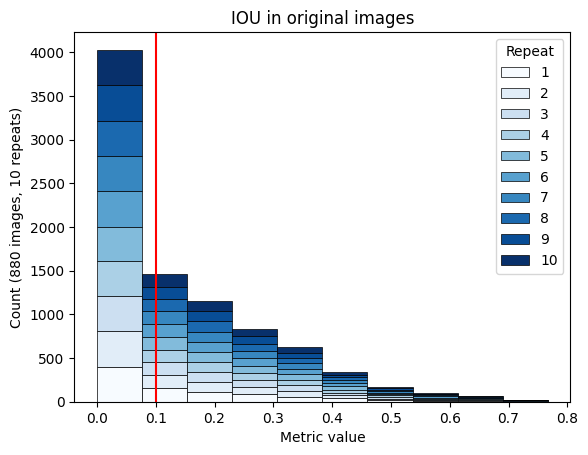

In [224]:
def plot_hist_metric_in_original(metric, cutoff):
    m = df[(df['metric']==metric)].copy()
    n_reps = 10
    data = [m[(m['repeat']==r) & (m['distortion'] == m['distortion'].unique()[0])]['original'].tolist() for r in range(1, 1+n_reps)]
    colors = [plt.cm.Blues(i / (n_reps-1)) for i in range(n_reps)]

    plt.hist(data, stacked=True, color=colors, label=range(1, 1+n_reps), edgecolor='black', linewidth=0.5)
    plt.axvline(x=cutoff, color='red', linewidth=1.5)
    plt.xlabel("Metric value")
    plt.ylabel("Count ("+str(len(m['image'].unique()))+ " images, "+str(len(data))+" repeats)")
    plt.title(metric.upper() + " in original images")
    plt.legend(title='Repeat')
    plt.show()


plot_hist_metric_in_original('f1', 0.2)
plot_hist_metric_in_original('iou', 0.1)

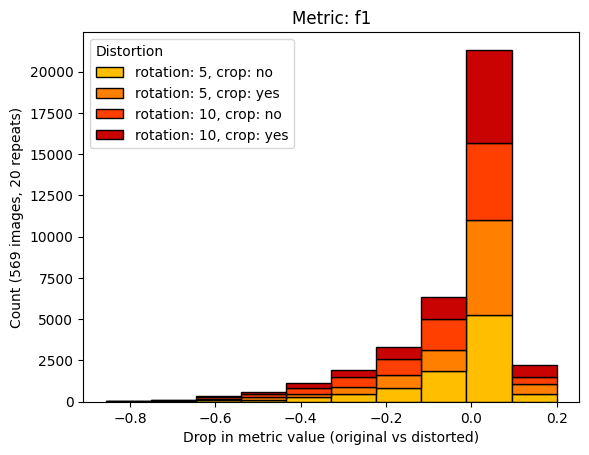

In [240]:
# for sorting strings alphanumerically
import re
def alphanum_key(s): 
    return [int(text) if text.isdigit() else text for text in re.split('(\d+)', s)]

def plot_hist_drop_in_metric_original_vs_distorted(metric, cutoff, which_part):
    
    if which_part == 'above':
        m = df[(df['metric']==metric) & (df['original'] >= cutoff)].copy()
    elif which_part == 'below':
        m = df[(df['metric']==metric) & (df['original'] < cutoff)].copy()
    
    all_distortions = sorted(m['distortion'].unique(), key=alphanum_key)
    colors = ['#ffbf00', '#ff7f00', '#ff3f00', '#c90202']
    assert len(colors) == len(all_distortions)
    data = [m[m['distortion'] == x]['drop_value'].tolist() for x in all_distortions]

    plt.hist(data, stacked=True, color=colors, label=all_distortions, edgecolor='black')
    plt.legend(title='Distortion')._legend_box.align = "left"
    plt.xlabel("Drop in metric value (original vs distorted)")
    plt.ylabel("Count ("+str(len(m['image'].unique()))+ " images, "+str(len(m['repeat'].unique()))+" repeats)")
    plt.title("Metric: "+metric)
    plt.show()


plot_hist_drop_in_metric_original_vs_distorted('f1', 0.2, 'below')

(array([   7.,   18.,   73.,  217.,  554., 1811.,  570.,  184.,   68.,
          18.]),
 array([-0.852459  , -0.6971659 , -0.54187279, -0.38657969, -0.23128658,
        -0.07599348,  0.07929963,  0.23459273,  0.38988583,  0.54517894,
         0.70047204]),
 <BarContainer object of 10 artists>)

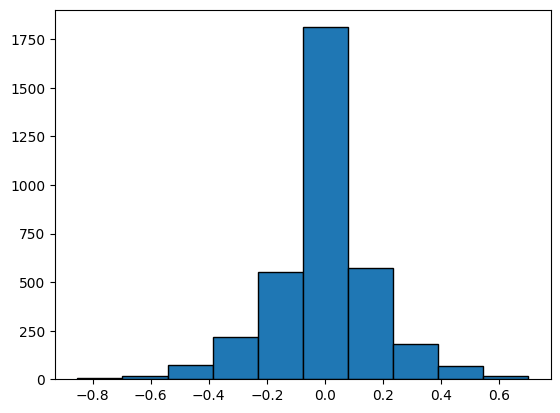

In [4]:
plt.hist(df[(df['repeat'] == 0) & (df['metric'] == 'f1')]['drop_value'].tolist(), edgecolor='black')

/tmp/ipykernel_8907/1221149227.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["rot_crop"] = df_filtered["rot"].astype(str) + "_crop" + df_filtered["crop"].astype(str)
/tmp/ipykernel_8907/1221149227.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="rot_crop", y="value", palette="Set2")


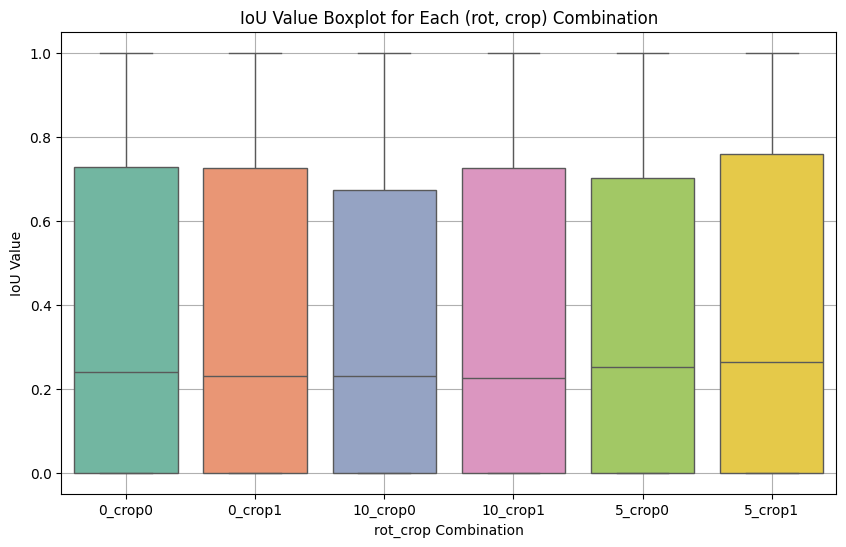

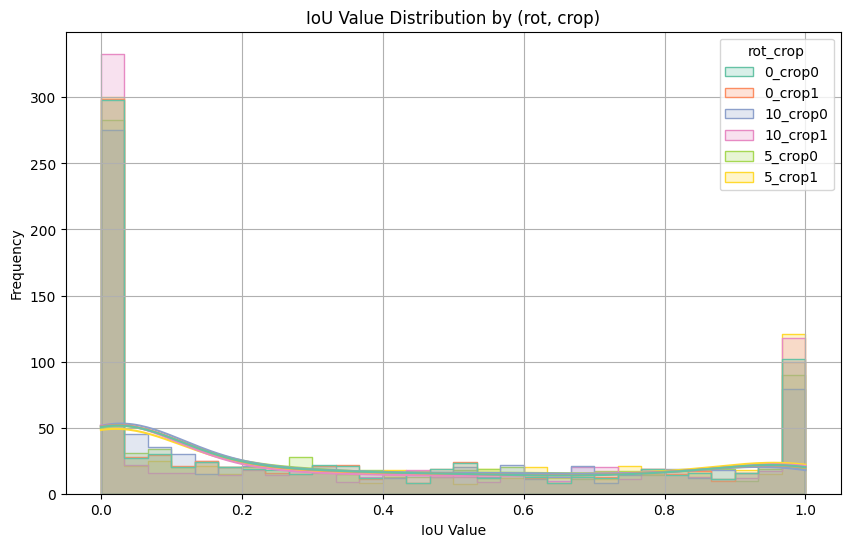

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv('aggregated_results.csv')

# Filter for relevant rows
df_filtered = df[
    (df["metric"] == "precision") &
    (df["dict_number"] == 0) &
    (df["rot"].isin([0, 5, 10])) &
    (df["crop"].isin([0, 1]))
]

# Create a label column for grouping
df_filtered["rot_crop"] = df_filtered["rot"].astype(str) + "_crop" + df_filtered["crop"].astype(str)

# === Boxplot ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x="rot_crop", y="value", palette="Set2")
plt.title("IoU Value Boxplot for Each (rot, crop) Combination")
plt.xlabel("rot_crop Combination")
plt.ylabel("IoU Value")
plt.grid(True)
plt.show()

# === Distribution plots ===
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x="value", hue="rot_crop", kde=True, bins=30, palette="Set2", element="step")
plt.title("IoU Value Distribution by (rot, crop)")
plt.xlabel("IoU Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

/tmp/ipykernel_8907/89051783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["rot_crop"] = df_filtered["rot"].astype(str) + "_crop" + df_filtered["crop"].astype(str)
/tmp/ipykernel_8907/89051783.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=summary_df, x="rot_crop", y="median_iou", palette="Set2")


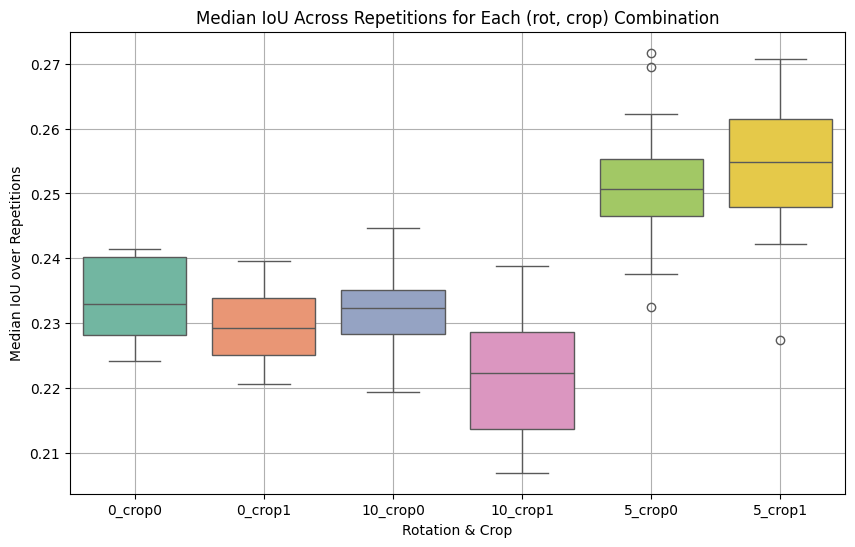

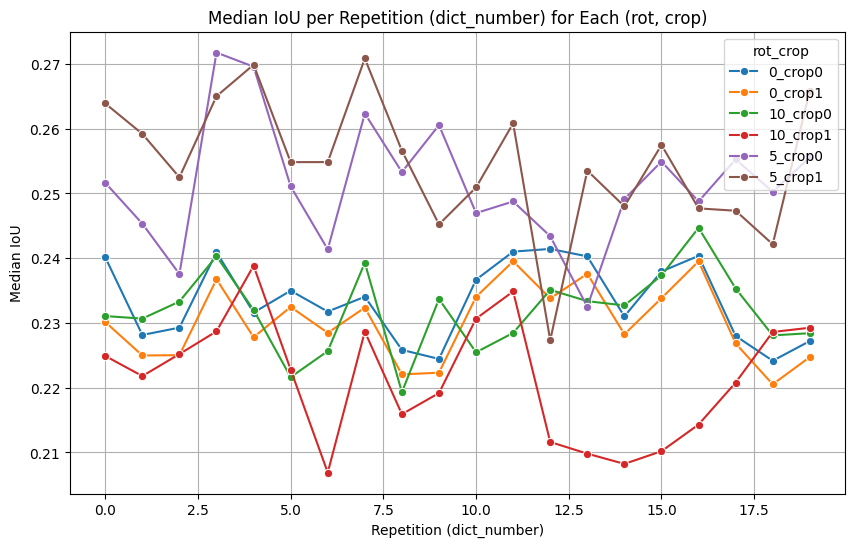

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter
df = pd.read_csv('aggregated_results.csv')
df_filtered = df[
    (df["metric"] == "precision") &
    (df["rot"].isin([0, 5, 10])) &
    (df["crop"].isin([0, 1]))
]

# Create combined label
df_filtered["rot_crop"] = df_filtered["rot"].astype(str) + "_crop" + df_filtered["crop"].astype(str)

# Compute median IoU per (rot_crop, dict_number)
summary_df = df_filtered.groupby(["rot_crop", "dict_number"])["value"].median().reset_index(name="median_iou")

# Boxplot of median IoU across repetitions
plt.figure(figsize=(10, 6))
sns.boxplot(data=summary_df, x="rot_crop", y="median_iou", palette="Set2")
plt.title("Median IoU Across Repetitions for Each (rot, crop) Combination")
plt.xlabel("Rotation & Crop")
plt.ylabel("Median IoU over Repetitions")
plt.grid(True)
plt.show()

# Optional: line plot for medians across dict_numbers
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary_df, x="dict_number", y="median_iou", hue="rot_crop", marker="o")
plt.title("Median IoU per Repetition (dict_number) for Each (rot, crop)")
plt.xlabel("Repetition (dict_number)")
plt.ylabel("Median IoU")
plt.grid(True)
plt.legend(title="rot_crop")
plt.show()
